<a href="https://colab.research.google.com/github/RoyZhaoGA/DroughtForecastAI/blob/main/CNN_LSTM_TestDroughtPrediction200k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**ACTUAL CODE AND TESTING BEGINS HERE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
#processed_dataset = pd.read_csv("/content/drive/MyDrive/DroughtCastAI/Dataset/Processed_Datasets/CMIP6_processed_dataset_200km_version2_1_month_lag.csv")

processed_dataset=pd.read_csv("/content/drive/MyDrive/DroughtCastAI/Dataset/Processed_Datasets/CMIP6_processed_dataset_200km_version2_1_month_lag_normalizedV1.csv")
processed_dataset.describe()

,Unnamed: 0,Month,Lat,Lon,Lat_nom,Lon_nom,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,...,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,year,month2,next_month_soil_moisture_am,next_month_spei01
count,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,...,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000
mean,41789.500000,201906.427614,6.426204,18.674333,0.566073,0.523528,0.616149,0.680634,0.627456,0.623594,...,0.355155,0.294809,0.574940,0.077142,0.435318,0.423864,0.499910,0.499946,0.203024,0.435303
std,24127.612087,242.792918,17.759911,15.790527,0.253463,0.231288,0.138251,0.152096,0.140827,0.225205,...,0.284145,0.229432,0.157630,0.125326,0.134340,0.128545,0.304121,0.308172,0.194927,0.134487
min,0.000000,201505.000000,-33.238000,-17.068000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20894.750000,201705.000000,-6.288000,8.085000,0.384621,0.368423,0.537881,0.586065,0.532270,0.434080,...,0.078629,0.086543,0.492155,0.000162,0.349924,0.339188,0.250000,0.272727,0.046626,0.350065
50%,41789.500000,201906.000000,9.881000,20.661000,0.615379,0.552628,0.627918,0.717181,0.619225,0.639959,...,0.283378,0.222722,0.588457,0.011046,0.432775,0.414981,0.500000,0.454545,0.134407,0.432857
75%,62684.250000,202107.000000,20.661000,29.644000,0.769227,0.684204,0.702787,0.799416,0.731203,0.830981,...,0.605967,0.479806,0.675972,0.106523,0.524657,0.507759,0.750000,0.727273,0.308346,0.524755
max,83579.000000,202308.000000,36.831000,51.204000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
processed_dataset.columns

Index(['Unnamed: 0', 'Month', 'Lat', 'Lon', 'Lat_nom', 'Lon_nom',
       'temperature_2m', 'temperature_2m_min', 'temperature_2m_max',
       'dewpoint_temperature_2m', 'total_precipitation_sum',
       'total_precipitation_min', 'total_precipitation_max',
       'u_component_of_wind_10m', 'v_component_of_wind_10m',
       'surface_net_solar_radiation_sum', 'total_evaporation_sum',
       'soil_moisture_am', 'soil_moisture_pm', 'NDVI', 'EVI',
       'next_month_tempreature', 'next_month_precipitation', 'spei01',
       'spei03', 'year', 'month2', 'next_month_soil_moisture_am',
       'next_month_spei01', 'datetime'],
      dtype='object')

In [ ]:
train_months = [201505, 201506, 201507, 201508, 201509, 201510, 201511, 201512,
201601, 201602, 201603, 201604, 201605, 201606, 201607, 201608,
201609, 201610, 201611, 201612, 201701, 201702, 201703, 201704,
201705, 201706, 201707, 201708, 201709, 201710, 201711, 201712,
201801, 201802, 201803, 201804, 201805, 201806, 201807, 201808,
201809, 201810, 201811, 201812, 201901, 201902, 201903, 201904,
201905, 201906, 201907, 201908, 201909, 201910, 201911, 201912,
202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008,
202009, 202010, 202011, 202012, 202101, 202102, 202103, 202104, 202105, 202106, 202107, 202108, 202109,
202110, 202111, 202112, 202201, 202202, 202203, 202204, 202205]
test_months = [202206, 202207, 202208, 202209, 202210, 202211, 202212, 202301, 202302, 202303, 202304, 202305, 202306, 202307, 202308]

In [ ]:
train = processed_dataset[processed_dataset["Month"].isin(train_months)]
test = processed_dataset[processed_dataset["Month"].isin(test_months)]

In [ ]:
train.describe()

,Unnamed: 0,Month,Lat,Lon,Lat_nom,Lon_nom,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,...,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,year,month2,next_month_soil_moisture_am,next_month_spei01
count,71060.000000,71060.000000,71060.000000,71060.000000,71060.000000,71060.000000,71060.000000,71060.000000,71060.000000,71060.000000,...,71060.000000,71060.000000,71060.000000,71060.000000,71060.000000,71060.000000,71060.000000,71060.000000,71060.000000,71060.000000
mean,41787.380383,201844.129412,6.423592,18.677666,0.566036,0.523577,0.615041,0.679158,0.626703,0.622897,...,0.355111,0.294863,0.572752,0.076664,0.433573,0.420148,0.422059,0.498396,0.201515,0.434033
std,24129.651463,207.423892,17.759399,15.791407,0.253456,0.231301,0.137978,0.152368,0.140754,0.226980,...,0.284824,0.229869,0.157482,0.124410,0.132309,0.126703,0.260076,0.312320,0.194389,0.132225
min,0.000000,201505.000000,-33.238000,-17.068000,0.000000,0.000000,0.000000,0.000000,0.061412,0.000000,...,0.000000,0.000000,0.004075,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20895.000000,201702.000000,-6.737250,8.085000,0.378209,0.368423,0.537351,0.584515,0.531856,0.431325,...,0.078274,0.086245,0.490381,0.000143,0.349571,0.337206,0.250000,0.272727,0.045773,0.350091
50%,41788.000000,201811.000000,9.881000,20.661000,0.615379,0.552628,0.627604,0.715882,0.619163,0.639832,...,0.281476,0.221701,0.587182,0.010687,0.430489,0.411328,0.375000,0.454545,0.133203,0.430915
75%,62684.000000,202008.000000,20.661000,30.093250,0.769227,0.690785,0.701365,0.798710,0.730294,0.832298,...,0.607232,0.480805,0.673227,0.106995,0.521782,0.502700,0.625000,0.727273,0.305823,0.522116
max,83564.000000,202205.000000,36.831000,51.204000,1.000000,1.000000,1.000000,1.000000,0.994163,1.000000,...,1.000000,1.000000,0.988108,1.000000,1.000000,1.000000,0.875000,1.000000,0.997858,1.000000


In [ ]:
# 4. Split data into features (X) and target (y)

#BEFORE COLUMN REMOVAL
X_train = train[['Lat_nom', 'Lon_nom', 'temperature_2m',
       'temperature_2m_min', 'temperature_2m_max', 'dewpoint_temperature_2m',
       'total_precipitation_sum', 'total_precipitation_min',
       'total_precipitation_max', 'u_component_of_wind_10m',
       'v_component_of_wind_10m', 'surface_net_solar_radiation_sum',
       'total_evaporation_sum', 'soil_moisture_am', 'soil_moisture_pm', 'NDVI',
       'EVI', 'next_month_tempreature', 'next_month_precipitation', 'year', 'month2', 'spei01']]
y_train = train['next_month_spei01']

# X = processed_dataset[['Lat', 'Lon', 'temperature_2m','dewpoint_temperature_2m',
#        'total_precipitation_sum', 'u_component_of_wind_10m',
#        'v_component_of_wind_10m', 'surface_net_solar_radiation_sum',
#        'total_evaporation_sum', 'soil_moisture', 'NDVI',
#        'EVI', 'next_month_tempreature', 'next_month_precipitation', 'year', 'month2']]
# y = processed_dataset['spei01']

X_test = test[['Lat_nom', 'Lon_nom', 'temperature_2m',
       'temperature_2m_min', 'temperature_2m_max', 'dewpoint_temperature_2m',
       'total_precipitation_sum', 'total_precipitation_min',
       'total_precipitation_max', 'u_component_of_wind_10m',
       'v_component_of_wind_10m', 'surface_net_solar_radiation_sum',
       'total_evaporation_sum', 'soil_moisture_am', 'soil_moisture_pm', 'NDVI',
       'EVI', 'next_month_tempreature', 'next_month_precipitation', 'year', 'month2', 'spei01']]

y_test = test['next_month_spei01']

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

predicted_values=df["y_pred"]
actual_values=df["y_test"]
# Calculate Mean Absolute Error
mae = mean_absolute_error(actual_values, predicted_values)


# Calculate Mean Squared Error
mse = mean_squared_error(actual_values, predicted_values)

# Calculate Root Mean Squared Error
rmse = sqrt(mse)

# Calculate R-squared
r2 = r2_score(actual_values, predicted_values)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 2.0316414585767064
Mean Absolute Error (MAE): 1.0951405925710203
Root Mean Squared Error (RMSE): 1.425356607511505
R-squared (R²): 0.052852045999144504


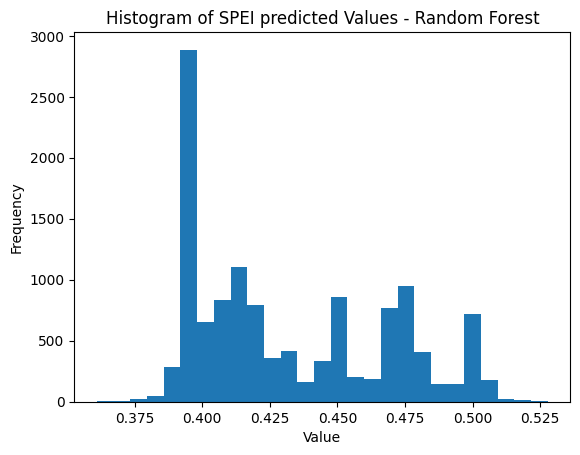

In [ ]:
plt.hist(y_pred, bins='auto')  # 'auto' lets matplotlib decide the number of bins
plt.title('Histogram of SPEI predicted Values - Random Forest')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

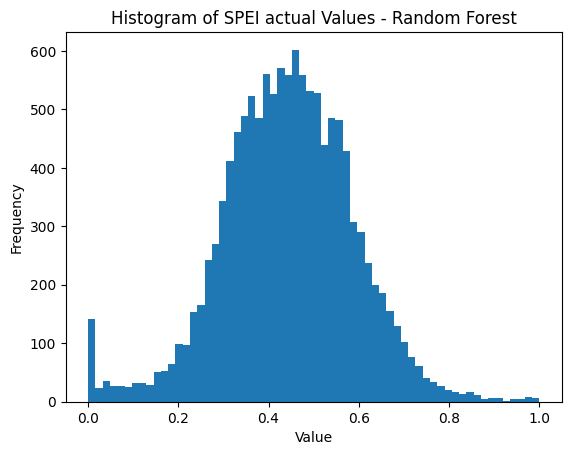

In [ ]:
plt.hist(y_test, bins='auto')  # 'auto' lets matplotlib decide the number of bins
plt.title('Histogram of SPEI actual Values - Random Forest')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [ ]:
df

,y_test,y_pred
85,1.257560,-0.346984
86,0.641762,-0.260325
87,1.150840,-0.082410
88,0.028160,-0.119840
89,-1.514450,-0.494447
...,...,...
83575,0.317675,1.210739
83576,0.585810,0.790910
83577,1.418990,0.873738
83578,0.518092,1.030989


In [ ]:
df.describe()

,y_test,y_pred
count,12520.000000,12520.000000
mean,-0.574912,-0.635859
std,1.464644,0.562543
min,-5.000000,-3.479424
25%,-1.500363,-0.947902
50%,-0.548688,-0.517430
75%,0.398345,-0.203151
max,5.000000,2.626002


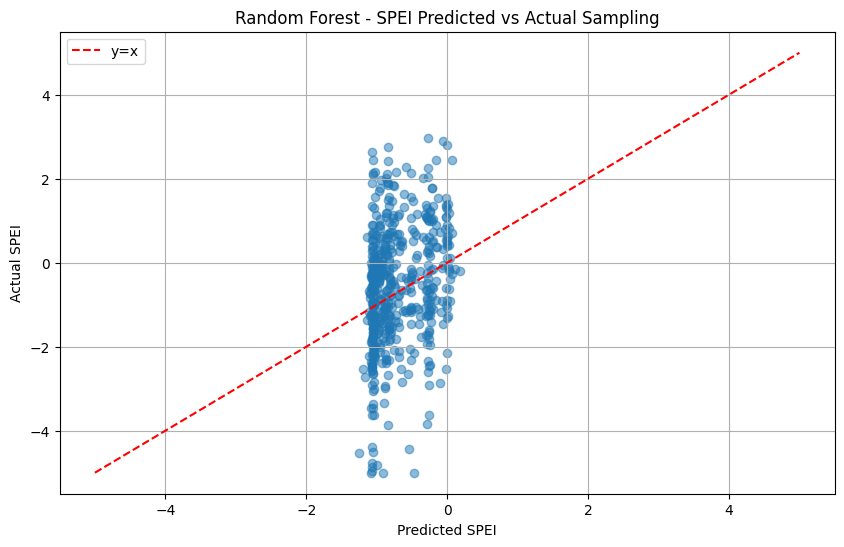

In [ ]:
# Sample 100 points from the DataFrame
sampled_df = df.sample(n=500, random_state=42)  # Set random_state for reproducibility
#sampled_df=df3
plt.figure(figsize=(10, 6))
plt.scatter(sampled_df['y_pred'], sampled_df['y_test'], alpha=0.5)

# Add a 45-degree line (y = x)
plt.plot([-5, 5], [-5, 5], color='red', linestyle='--', label='y=x')

plt.title('Random Forest - SPEI Predicted vs Actual Sampling')
plt.xlabel('Predicted SPEI')
plt.ylabel('Actual SPEI')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
test_geo_dataset = test.copy(deep=True)
test_geo_dataset["y_test"] = y_test
test_geo_dataset["y_pred"] = y_pred

In [ ]:
test_geo_dataset

,Unnamed: 0,Month,Lat,Lon,Lat_nom,Lon_nom,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,...,next_month_precipitation,spei01,spei03,year,month2,next_month_soil_moisture_am,next_month_spei01,datetime,y_test,y_pred
85,85,202206,15.271,-17.068,0.692303,0.0,0.651210,0.811272,0.590300,0.893612,...,0.017341,0.553662,0.411257,0.875,0.454545,0.265588,0.625756,2022-06-01,0.625756,0.475671
86,86,202207,15.271,-17.068,0.692303,0.0,0.673828,0.843099,0.571280,0.933215,...,0.027822,0.625756,0.588634,0.875,0.545455,0.210708,0.564176,2022-07-01,0.564176,0.483064
87,87,202208,15.271,-17.068,0.692303,0.0,0.679760,0.876271,0.547685,0.958565,...,0.109330,0.564176,0.603077,0.875,0.636364,0.302344,0.615084,2022-08-01,0.615084,0.506056
88,88,202209,15.271,-17.068,0.692303,0.0,0.675974,0.862387,0.541452,0.966455,...,0.083175,0.615084,0.620562,0.875,0.727273,0.279687,0.502816,2022-09-01,0.502816,0.502513
89,89,202210,15.271,-17.068,0.692303,0.0,0.693866,0.856938,0.605288,0.958717,...,0.004924,0.502816,0.583135,0.875,0.818182,0.255351,0.348555,2022-10-01,0.348555,0.451785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83575,83575,202304,11.678,51.204,0.641025,1.0,0.668813,0.806416,0.599871,0.885136,...,0.005127,0.643295,0.533441,1.000,0.272727,0.197108,0.531767,2023-04-01,0.531767,0.579680
83576,83576,202305,11.678,51.204,0.641025,1.0,0.706766,0.808353,0.624060,0.920031,...,0.001334,0.531767,0.561051,1.000,0.363636,0.196710,0.558581,2023-05-01,0.558581,0.557330
83577,83577,202306,11.678,51.204,0.641025,1.0,0.743538,0.865100,0.675925,0.848435,...,0.000101,0.558581,0.594758,1.000,0.454545,0.195077,0.641899,2023-06-01,0.641899,0.562414
83578,83578,202307,11.678,51.204,0.641025,1.0,0.770038,0.918836,0.691309,0.790252,...,0.012195,0.641899,0.583324,1.000,0.545455,0.198575,0.551809,2023-07-01,0.551809,0.577450


<ipython-input-18-da72e9abef14>:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


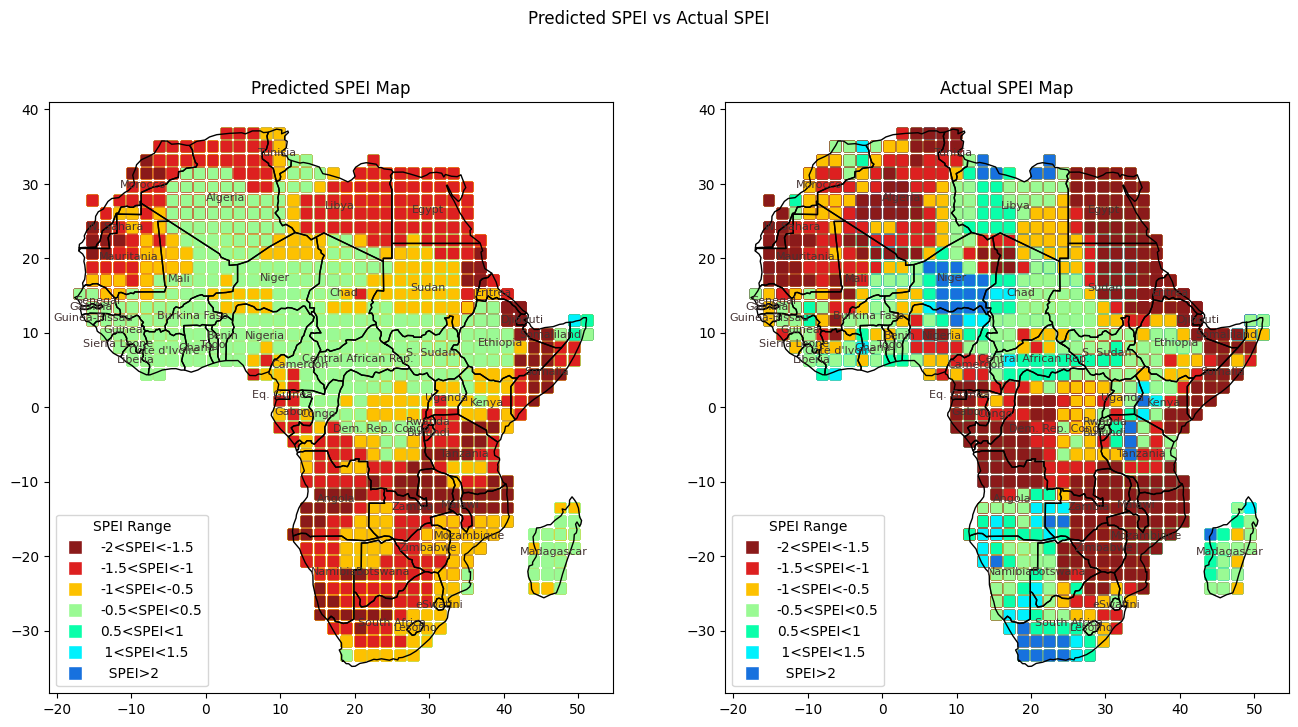

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the world map dataset with country borders
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the world map to include only African countries
africa = world[world['continent'] == 'Africa']

# Create a GeoDataFrame from the DataFrame
gdf = gpd.GeoDataFrame(test_geo_dataset, geometry=gpd.points_from_xy(test_geo_dataset['Lon'], test_geo_dataset['Lat']))

# Define colors based on predicted values
predicted_colors = []
for value in test_geo_dataset['y_pred']:
    if value <= 0.35:
        predicted_colors.append('#8B1A1A')  # Dark Red
    elif value <= 0.4:
        predicted_colors.append('#DD2020')  # Red-Orange
    elif value <= 0.45:
        predicted_colors.append('#FDC100')  # Dark Orange
    elif value <= 0.55:
        predicted_colors.append('#9AFA94')  # Gold
    elif value <= 0.6:
        predicted_colors.append('#09FFAA')  # Yellow
    elif value <= 0.65:
        predicted_colors.append('#00F1FD')  # Orange
    elif value <= 1:
        predicted_colors.append('#1771DE')  # Dark Orange
    else:
        print("value is", value)
        predicted_colors.append('#FF0000')  # Dark Red (fallback)

# Define colors based on actual values
actual_colors = []
for value in test_geo_dataset['y_test']:
    if value <= 0.35:
        actual_colors.append('#8B1A1A')  # Dark Red
    elif value <= 0.4:
        actual_colors.append('#DD2020')  # Red-Orange
    elif value <= 0.45:
        actual_colors.append('#FDC100')  # Dark Orange
    elif value <= 0.55:
        actual_colors.append('#9AFA94')  # Gold
    elif value <= 0.6:
        actual_colors.append('#09FFAA')  # Yellow
    elif value <= 0.65:
        actual_colors.append('#00F1FD')  # Orange
    elif value <= 1:
        actual_colors.append('#1771DE')  # Dark Orange
    else:
        print("value is", value)
        actual_colors.append('#FF0000')  # Dark Red (fallback)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Plot the filtered African map with country borders and country names for both subplots
for ax in axs:
    africa.boundary.plot(ax=ax, linewidth=1, color='black')
    for idx, row in africa.iterrows():
        ax.text(row['geometry'].centroid.x, row['geometry'].centroid.y, row['name'], fontsize=8, ha='center', va='center', color='#443333')

# Plot the GeoDataFrame with the defined colors based on predicted values and actual values
gdf.plot(color=predicted_colors, ax=axs[0], marker='s', markersize=50, legend=True, legend_kwds={'label': "Predicted SPEI"})
gdf.plot(color=actual_colors, ax=axs[1], marker='s', markersize=50, legend=True, legend_kwds={'label': "Actual SPEI"})


 # Create a legend for the colors and their corresponding values
legend_labels = {
    '#8B1A1A': 'SPEI<-2',
    '#8B1A1A': '-2<SPEI<-1.5',
    '#DD2020': '-1.5<SPEI<-1',
    '#FDC100': '-1<SPEI<-0.5',
    '#9AFA94': '-0.5<SPEI<0.5',
    '#09FFAA': '0.5<SPEI<1',
    '#00F1FD': ' 1<SPEI<1.5',
    '#1771DE': ' 1.5<SPEI<2',
    '#1771DE': '  SPEI>2',
}
handles = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markersize=10, label=label)
           for color, label in legend_labels.items()]

# Add the legend to the plot
axs[0].legend(handles=handles, title="SPEI Range")
axs[1].legend(handles=handles, title="SPEI Range")

# Set titles for subplots
axs[0].set_title('Predicted SPEI Map')
axs[1].set_title('Actual SPEI Map')

# Add an overall title
plt.suptitle("Predicted SPEI vs Actual SPEI")

# Show the plot
plt.show()

**TEST Result**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

predicted_values=y_pred
actual_values=y_test
# Calculate Mean Absolute Error
mae = mean_absolute_error(actual_values, predicted_values)


# Calculate Mean Squared Error
mse = mean_squared_error(actual_values, predicted_values)

# Calculate Root Mean Squared Error
rmse = sqrt(mse)

# Calculate R-squared
r2 = r2_score(actual_values, predicted_values)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 0.010416056141036387
Mean Absolute Error (MAE): 0.0757112793646471
Root Mean Squared Error (RMSE): 0.10205908161960105
R-squared (R²): 0.42558709886966717


In [ ]:
mask = y_test > 0.5

# Apply the mask to both actual and predicted columns
actual_values_filtered = y_test[mask]
predicted_values_corresponding = y_pred[mask]

predicted_values=predicted_values_corresponding
actual_values=actual_values_filtered
# Calculate Mean Absolute Error
mae = mean_absolute_error(actual_values, predicted_values)


# Calculate Mean Squared Error
mse = mean_squared_error(actual_values, predicted_values)

# Calculate Root Mean Squared Error
rmse = sqrt(mse)

# Calculate R-squared
r2 = r2_score(actual_values, predicted_values)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 0.015781278162776982
Mean Absolute Error (MAE): 0.0997122338604191
Root Mean Squared Error (RMSE): 0.12562355735600303
R-squared (R²): -1.9679907309959335


In [ ]:
mask = y_test < 0.5

# Apply the mask to both actual and predicted columns
actual_values_filtered = y_test[mask]
predicted_values_corresponding = y_pred[mask]

predicted_values=predicted_values_corresponding
actual_values=actual_values_filtered
# Calculate Mean Absolute Error
mae = mean_absolute_error(actual_values, predicted_values)


# Calculate Mean Squared Error
mse = mean_squared_error(actual_values, predicted_values)

# Calculate Root Mean Squared Error
rmse = sqrt(mse)

# Calculate R-squared
r2 = r2_score(actual_values, predicted_values)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 0.007985967313979435
Mean Absolute Error (MAE): 0.0648404428694304
Root Mean Squared Error (RMSE): 0.08936423957030819
R-squared (R²): 0.1256629606095162


**Result  MSE**

SPEI Mean Squared Error: 0.010079140857792247

In [ ]:
# 5. Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

rf_regressor = RandomForestRegressor(random_state=42, verbose = 2)

parameters = {
    'n_estimators': [10, 50, 100, 200, 500, 1000],
    'max_depth': [None, 10, 20, 30, 60, 120, 500]
    # ... add other hyperparameters as needed
}

# less_parameters = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 30]
#     # ... add other hyperparameters as needed
# }

# 6. Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=parameters,
                           cv=5, scoring='neg_mean_squared_error', verbose=3, n_jobs=-1)

# 7. Perform grid search
grid_search.fit(X_train, y_train)

#save results into a dataframe to be graphed later
training_results_df = pd.DataFrame(grid_search.cv_results_)

# 8. Get best parameters and best model
best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_parameters}")
# 9. Predict on the test set using the best model
y_pred = best_model.predict(X_test)

# 10. Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error of Best Model for SPEI: {mse}")

# 11. Use the best model for new predictions (if necessary)
# new_data = [[____NEW_FEATURE_1_VALUE____, ____NEW_FEATURE_2_VALUE____, ____...____]]
# new_prediction = best_model.predict(new_data)
# print(f"Prediction for new data: {new_prediction}")

Fitting 5 folds for each of 42 candidates, totalling 210 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:  1.1min


building tree 41 of 1000
building tree 42 of 1000
building tree 43 of 1000
building tree 44 of 1000
building tree 45 of 1000
building tree 46 of 1000
building tree 47 of 1000
building tree 48 of 1000
building tree 49 of 1000
building tree 50 of 1000
building tree 51 of 1000
building tree 52 of 1000
building tree 53 of 1000
building tree 54 of 1000
building tree 55 of 1000
building tree 56 of 1000
building tree 57 of 1000
building tree 58 of 1000
building tree 59 of 1000
building tree 60 of 1000
building tree 61 of 1000
building tree 62 of 1000
building tree 63 of 1000
building tree 64 of 1000
building tree 65 of 1000
building tree 66 of 1000
building tree 67 of 1000
building tree 68 of 1000
building tree 69 of 1000
building tree 70 of 1000
building tree 71 of 1000
building tree 72 of 1000
building tree 73 of 1000
building tree 74 of 1000
building tree 75 of 1000
building tree 76 of 1000
building tree 77 of 1000
building tree 78 of 1000
building tree 79 of 1000
building tree 80 of 1000


[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:  4.4min


building tree 162 of 1000
building tree 163 of 1000
building tree 164 of 1000
building tree 165 of 1000
building tree 166 of 1000
building tree 167 of 1000
building tree 168 of 1000
building tree 169 of 1000
building tree 170 of 1000
building tree 171 of 1000
building tree 172 of 1000
building tree 173 of 1000
building tree 174 of 1000
building tree 175 of 1000
building tree 176 of 1000
building tree 177 of 1000
building tree 178 of 1000
building tree 179 of 1000
building tree 180 of 1000
building tree 181 of 1000
building tree 182 of 1000
building tree 183 of 1000
building tree 184 of 1000
building tree 185 of 1000
building tree 186 of 1000
building tree 187 of 1000
building tree 188 of 1000
building tree 189 of 1000
building tree 190 of 1000
building tree 191 of 1000
building tree 192 of 1000
building tree 193 of 1000
building tree 194 of 1000
building tree 195 of 1000
building tree 196 of 1000
building tree 197 of 1000
building tree 198 of 1000
building tree 199 of 1000
building tre

[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:  9.8min


building tree 365 of 1000
building tree 366 of 1000
building tree 367 of 1000
building tree 368 of 1000
building tree 369 of 1000
building tree 370 of 1000
building tree 371 of 1000
building tree 372 of 1000
building tree 373 of 1000
building tree 374 of 1000
building tree 375 of 1000
building tree 376 of 1000
building tree 377 of 1000
building tree 378 of 1000
building tree 379 of 1000
building tree 380 of 1000
building tree 381 of 1000
building tree 382 of 1000
building tree 383 of 1000
building tree 384 of 1000
building tree 385 of 1000
building tree 386 of 1000
building tree 387 of 1000
building tree 388 of 1000
building tree 389 of 1000
building tree 390 of 1000
building tree 391 of 1000
building tree 392 of 1000
building tree 393 of 1000
building tree 394 of 1000
building tree 395 of 1000
building tree 396 of 1000
building tree 397 of 1000
building tree 398 of 1000
building tree 399 of 1000
building tree 400 of 1000
building tree 401 of 1000
building tree 402 of 1000
building tre

[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed: 17.5min


building tree 648 of 1000
building tree 649 of 1000
building tree 650 of 1000
building tree 651 of 1000
building tree 652 of 1000
building tree 653 of 1000
building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tree 679 of 1000
building tree 680 of 1000
building tree 681 of 1000
building tree 682 of 1000
building tree 683 of 1000
building tree 684 of 1000
building tree 685 of 1000
building tre

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    4.6s


Mean Squared Error of Best Model for SPEI: 0.9891065606578996


Best Parameters: max_depth = 60, n_estimators = 1000
MSE: 0.9891065606578996

In [ ]:
#Saving the model with joblib
import joblib

filename = '/content/drive/MyDrive/DroughtCastAI/Models/Random Forest/SPEI_11/8.sav'
joblib.dump(best_model, filename)

In [ ]:
#retrieving the model from file
loaded_model = joblib.load(filename)

# evaluate model
y_predict = loaded_model.predict(X_test)

mse_loaded = mean_squared_error(y_test, y_predict)
print(f"Mean Squared Error: {mse}")

In [ ]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics.pairwise import rbf_kernel

In [ ]:
! python -m pip install scikit-learn-intelex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.2/136.2 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.2/75.2 MB 20.1 MB/s eta 0:00:00


In [ ]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [ ]:
#X = sample_processed_dataset[['Lat', 'Lon']]
processed_dataset = pd.read_csv("/content/drive/MyDrive/DroughtCastAI/Dataset/Processed_Datasets/CMIP6_processed_dataset_200km.csv")
X = processed_dataset[['Lat', 'Lon', 'temperature_2m',
       'temperature_2m_min', 'temperature_2m_max', 'dewpoint_temperature_2m',
       'total_precipitation_sum', 'total_precipitation_min',
       'total_precipitation_max', 'u_component_of_wind_10m',
       'v_component_of_wind_10m', 'surface_net_solar_radiation_sum',
       'total_evaporation_sum', 'soil_moisture_am', 'soil_moisture_pm', 'NDVI',
       'EVI', 'next_month_tempreature', 'next_month_precipitation', 'year', 'month2']]

y = processed_dataset['spei01']

# X = processed_dataset[['Lat', 'Lon', 'temperature_2m','dewpoint_temperature_2m',
#        'total_precipitation_sum', 'u_component_of_wind_10m',
#        'v_component_of_wind_10m', 'surface_net_solar_radiation_sum',
#        'total_evaporation_sum', 'soil_moisture', 'NDVI',
#        'EVI', 'next_month_tempreature', 'next_month_precipitation', 'year', 'month2']]
# y = processed_dataset['spei01']

gamma=0.05
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for SVR)
scaler = StandardScaler()
# TODO: Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#X_train_scaled=X_train
#X_test_scaled=X_test
# Create the SVR model
# TODO: Choose and set the kernel type (e.g., 'linear', 'poly', 'rbf', 'sigmoid')
svr_model = SVR(kernel='rbf',  gamma=gamma, verbose=True)
#svr_model = SVR(kernel=rbf_kernel, gamma=gamma, verbose=True, )

# Train the model using the training sets
svr_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = svr_model.predict(X_test_scaled)

# Evaluate the model
# TODO: Print out the mean squared error and the R-squared value to evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error: ', mse)
print('R-squared value: ', r2)

[LibSVM]Mean squared error:  1.1758173606293516
R-squared value:  0.34972985747901963


In [ ]:
processed_dataset = pd.read_csv("/content/drive/MyDrive/DroughtCastAI/Dataset/Processed_Datasets/CMIP6_processed_dataset_200km.csv")
X = processed_dataset[['Lat', 'Lon', 'temperature_2m',
       'temperature_2m_min', 'temperature_2m_max', 'dewpoint_temperature_2m',
       'total_precipitation_sum', 'total_precipitation_min',
       'total_precipitation_max', 'u_component_of_wind_10m',
       'v_component_of_wind_10m', 'surface_net_solar_radiation_sum',
       'total_evaporation_sum', 'soil_moisture_am', 'soil_moisture_pm', 'NDVI',
       'EVI', 'next_month_tempreature', 'next_month_precipitation', 'year', 'month2']]

y = processed_dataset['spei01']

# X = processed_dataset[['Lat', 'Lon', 'temperature_2m','dewpoint_temperature_2m',
#        'total_precipitation_sum', 'u_component_of_wind_10m',
#        'v_component_of_wind_10m', 'surface_net_solar_radiation_sum',
#        'total_evaporation_sum', 'soil_moisture', 'NDVI',
#        'EVI', 'next_month_tempreature', 'next_month_precipitation', 'year', 'month2']]
# y = processed_dataset['spei01']

gamma=0.05
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

svr_model = SVR(kernel='rbf',  gamma=gamma, verbose=True)

parameters = {
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf', 'sigmoid'],
    'C':[1,10,100,1000]
    # ... add other hyperparameters as needed
}

# 6. Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svr_model, param_grid=parameters,
                           cv=5, scoring='neg_mean_squared_error', verbose=3, n_jobs=-1)

# 7. Perform grid search
grid_search.fit(X_train, y_train)

#save results into a dataframe to be graphed later
training_results_df = pd.DataFrame(grid_search.cv_results_)

# 8. Get best parameters and best model
best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_parameters}")
# 9. Predict on the test set using the best model
y_pred = best_model.predict(X_test)

# 10. Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error of Best Model for SPEI: {mse}")

# 11. Use the best model for new predictions (if necessary)
# new_data = [[____NEW_FEATURE_1_VALUE____, ____NEW_FEATURE_2_VALUE____, ____...____]]
# new_prediction = best_model.predict(new_data)
# print(f"Prediction for new data: {new_prediction}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
